In [1]:

%matplotlib inline
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import cv2
import glob
import time


# Loading data 
it will also display one image from each class 

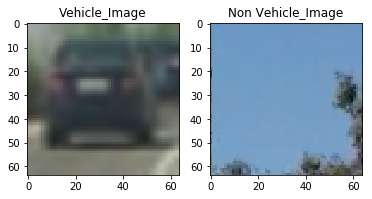

In [2]:
Vehicle_Images = glob.glob("vehicles/vehicles/**/*.png")
NonVehicle_Images = glob.glob("non-vehicles/non-vehicles/**/*.png")
fig=plt.figure()
fig.add_subplot(1,2, 1)
plt.title("Vehicle_Image")
plt.imshow(mpimg.imread(Vehicle_Images[0]))
fig.add_subplot(1,2,2)
plt.title("Non Vehicle_Image")
plt.imshow(mpimg.imread(NonVehicle_Images[0]))

# HOG features

In [3]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# RGB colorspace display using Hog features

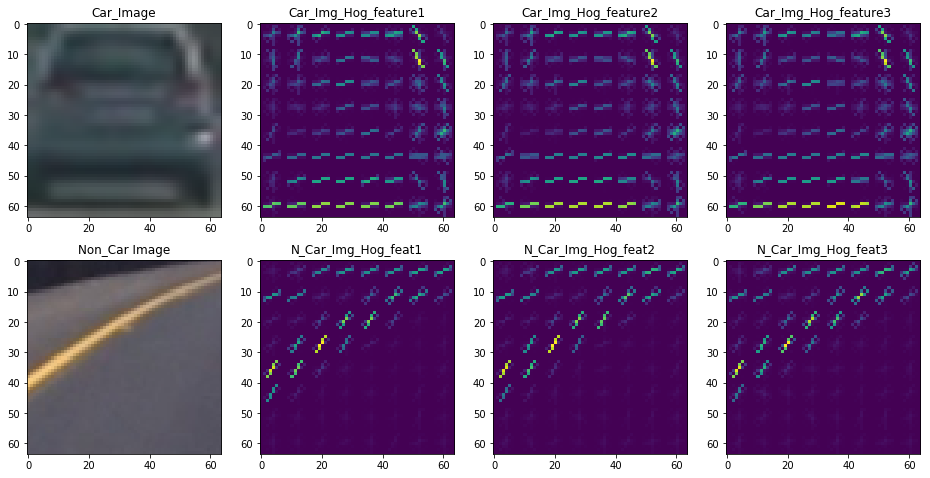

In [4]:
car_image  =  mpimg.imread(Vehicle_Images[10])
Non_Car_image = mpimg.imread(NonVehicle_Images[10])
hog_features1_car, hog_car_image_feature1=get_hog_features(car_image[:,:,0],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features2_car, hog_car_image_feature2=get_hog_features(car_image[:,:,1],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features_3_car, hog_car_image_feature3=get_hog_features(car_image[:,:,2],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features1_Non_Car, hog_Non_Car_image_feature1=get_hog_features(Non_Car_image[:,:,0],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features2_Non_Car, hog_Non_Car_image_feature2=get_hog_features(Non_Car_image[:,:,1],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features3_Non_Car, hog_Non_Car_image_feature3=get_hog_features(Non_Car_image[:,:,2],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,4,1)
plt.imshow(car_image)
plt.title("Car_Image")
fig.add_subplot(2,4,2)
plt.imshow(hog_car_image_feature1)
plt.title("Car_Img_Hog_feature1")
fig.add_subplot(2,4,3)
plt.imshow(hog_car_image_feature2)
plt.title("Car_Img_Hog_feature2")
fig.add_subplot(2,4,4)
plt.imshow(hog_car_image_feature3)
plt.title("Car_Img_Hog_feature3")

fig.add_subplot(2,4,5)
plt.imshow(Non_Car_image)
plt.title("Non_Car Image")
fig.add_subplot(2,4,6)
plt.imshow(hog_Non_Car_image_feature1)
plt.title("N_Car_Img_Hog_feat1")
fig.add_subplot(2,4,7)
plt.imshow(hog_Non_Car_image_feature2)
plt.title("N_Car_Img_Hog_feat2")
fig.add_subplot(2,4,8)
plt.imshow(hog_Non_Car_image_feature3)
plt.title("N_Car_Img_Hog_feat3")




# RGB colorspace display using Hog features

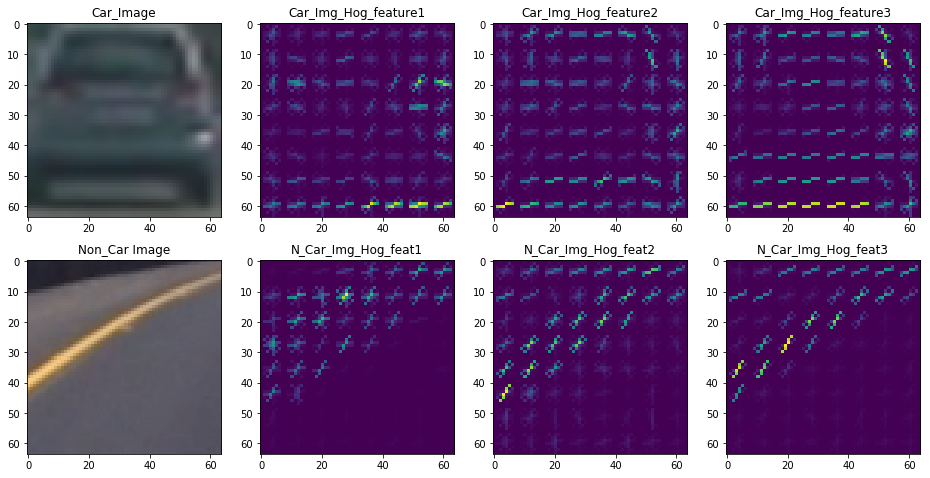

In [5]:
image_1  =  mpimg.imread(Vehicle_Images[10])
car_image  = cv2.cvtColor(image_1 , cv2.COLOR_RGB2HSV)
image_2 = mpimg.imread(NonVehicle_Images[10])
Non_Car_image  = cv2.cvtColor(image_2, cv2.COLOR_RGB2HSV)

hog_features1_car, hog_car_image_feature1=get_hog_features(car_image[:,:,0],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features2_car, hog_car_image_feature2=get_hog_features(car_image[:,:,1],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features_3_car, hog_car_image_feature3=get_hog_features(car_image[:,:,2],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features1_Non_Car, hog_Non_Car_image_feature1=get_hog_features(Non_Car_image[:,:,0],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features2_Non_Car, hog_Non_Car_image_feature2=get_hog_features(Non_Car_image[:,:,1],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)
hog_features3_Non_Car, hog_Non_Car_image_feature3=get_hog_features(Non_Car_image[:,:,2],orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec= True)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,4,1)
plt.imshow(image_1)
plt.title("Car_Image")
fig.add_subplot(2,4,2)
plt.imshow(hog_car_image_feature1)
plt.title("Car_Img_Hog_feature1")
fig.add_subplot(2,4,3)
plt.imshow(hog_car_image_feature2)
plt.title("Car_Img_Hog_feature2")
fig.add_subplot(2,4,4)
plt.imshow(hog_car_image_feature3)
plt.title("Car_Img_Hog_feature3")

fig.add_subplot(2,4,5)
plt.imshow(image_2)
plt.title("Non_Car Image")
fig.add_subplot(2,4,6)
plt.imshow(hog_Non_Car_image_feature1)
plt.title("N_Car_Img_Hog_feat1")
fig.add_subplot(2,4,7)
plt.imshow(hog_Non_Car_image_feature2)
plt.title("N_Car_Img_Hog_feat2")
fig.add_subplot(2,4,8)
plt.imshow(hog_Non_Car_image_feature3)
plt.title("N_Car_Img_Hog_feat3")

# bin-spatial

In [6]:


# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Color-features

In [7]:


# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [8]:


# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 3:
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# How I searched for the feature space

In [11]:
cell_per_block = 2 # HOG cells per block
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

color_space_vector=['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']
hog_channel_vector=[0,1,2,3]
orientation_vector=[9,11]
pix_per_cell_vector=[8,16]
for color_space in color_space_vector:
    for hog_channel in hog_channel_vector:
        for orient in orientation_vector:
            for pix_per_cell in pix_per_cell_vector:
                t1 = time.time()
                car_features = extract_features(Vehicle_Images, color_space=color_space, 
                                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                                orient=orient, pix_per_cell=pix_per_cell, 
                                                cell_per_block=cell_per_block, 
                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                                hist_feat=hist_feat, hog_feat=hog_feat)
                notcar_features = extract_features(NonVehicle_Images, color_space=color_space, 
                                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                                orient=orient, pix_per_cell=pix_per_cell, 
                                                cell_per_block=cell_per_block, 
                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                                hist_feat=hist_feat, hog_feat=hog_feat)

                X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
                t2 = time.time()
                print('Using:',orient,'orientations',pix_per_cell,
                      'pixels per cell and', cell_per_block,'cells per block and ',color_space,
                      'color space with ',hog_channel,' hog channel')
                print('Feature vector length:', len(X[0]))
                print(round(t2-t1)," seconds to extract features")
                X=[]
                print("")
                print(".....................................................")
                

Using: 9 orientations 8 pixels per cell and 2 cells per block and  RGB color space with  0  hog channel
Feature vector length: 2580
155  seconds to extract features

.....................................................
Using: 9 orientations 16 pixels per cell and 2 cells per block and  RGB color space with  0  hog channel
Feature vector length: 1140
43  seconds to extract features

.....................................................
Using: 11 orientations 8 pixels per cell and 2 cells per block and  RGB color space with  0  hog channel
Feature vector length: 2972
53  seconds to extract features

.....................................................
Using: 11 orientations 16 pixels per cell and 2 cells per block and  RGB color space with  0  hog channel
Feature vector length: 1212
47  seconds to extract features

.....................................................
Using: 9 orientations 8 pixels per cell and 2 cells per block and  RGB color space with  1  hog channel
Feature vector 

In [ ]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off


# looking through features to see which feature has good performance on the test images with linear SVM classifier

In [94]:

#cell_per_block = 2 # HOG cells per block
#spatial_size = (16, 16) # Spatial binning dimensions
#hist_bins = 16    # Number of histogram bins
#spatial_feat = True # Spatial features on or off
#hist_feat = True # Histogram features on or off
#hog_feat = True # HOG features on or off

#color_space_vector=['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']
#hog_channel_vector=[0,1,2,3]
#orientation_vector=[9,11]
#pix_per_cell_vector=[8,16]

#for color_space in color_space_vector:
#    for hog_channel in hog_channel_vector:
#        for orient in orientation_vector:
#            for pix_per_cell in pix_per_cell_vector:
#                car_features = extract_features(Vehicle_Images, color_space=color_space, 
#                                                spatial_size=spatial_size, hist_bins=hist_bins, 
#                                                orient=orient, pix_per_cell=pix_per_cell, 
#                                                cell_per_block=cell_per_block, 
#                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                                                hist_feat=hist_feat, hog_feat=hog_feat)
#                notcar_features = extract_features(NonVehicle_Images, color_space=color_space, 
#                                                spatial_size=spatial_size, hist_bins=hist_bins, 
#                                                orient=orient, pix_per_cell=pix_per_cell, 
#                                                cell_per_block=cell_per_block, 
#                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                                                hist_feat=hist_feat, hog_feat=hog_feat)##
#
#                X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
#                # Fit a per-column scaler
#                print(X.shape)
#                X_scaler = StandardScaler().fit(X)
#                # Apply the scaler to X
#                scaled_X = X_scaler.transform(X)#
#
                # Define the labels vector
#                y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
#
#
 #               # Split up data into randomized training and test sets
#                rand_state = np.random.randint(0, 100)
#                X_train, X_test, y_train, y_test = train_test_split(
#                scaled_X, y, test_size=0.2, random_state=rand_state)#
#
#                print('Using:',orient,'orientations',pix_per_cell,
#                      'pixels per cell and', cell_per_block,'cells per block and ',color_space,
#                      'color space with ',hog_channel,' hog channel')
#                print('Feature vector length:', len(X_train[0]))
#                # Use a linear SVC 
#                svc = LinearSVC()
#                # Check the training time for the SVC
#                t=time.time()
#                svc.fit(X_train, y_train)
#               t2 = time.time()
#                print(round(t2-t, 2), 'Seconds to train SVC...')
#                # Check the score of the SVC
#                print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
#                # Check the prediction time for a single sample
#                t=time.time()

# best configuration 

after runnig the above cell I foud out linear svm with with below configuration works very well
#### 11 orientations 8 pixels per cell and 2 cells per block and  HSV color space with  3  hog channel 
#### Feature vector length: 7284, 28.87 Seconds to train SVC... Test Accuracy of SVC =  0.990


# Best SVM

In [9]:

### TODO: Tweak these parameters and see how the results change.
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 3 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

car_features = extract_features(Vehicle_Images, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(NonVehicle_Images, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
print(X.shape)
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

(17760, 7284)
Using: 11 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7284
10.58 Seconds to train SVC...
Test Accuracy of SVC =  0.989


In [10]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def search(img, ystart, ystop, scale, color_space, svc, X_scaler, orient, 
              pix_per_cell, cell_per_block, spatial_size, hist_bins):
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    #Rectangle for storing array of rectangles where Cars are detected 
    Rectangles=[]
    img_tosearch = img[ystart:ystop,:,:]
    
    #color conversion depending on the color_space
    if color_space != 'RGB':
        if color_space == 'HSV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    else: ctrans_tosearch = np.copy(image) 
        
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))
            
    
            # Scale features and make a prediction
                     
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                Rectangles.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))) 
    return Rectangles
                 
                  
    

In [11]:
test_img = mpimg.imread('test1.jpg')

ystart = 402
ystop = 650
scale = 1.5

rectangles = search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

print('bumber of rectangle in image are ',len(rectangles))

bumber of rectangle in image are  8


# draw boxes

In [12]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=4):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


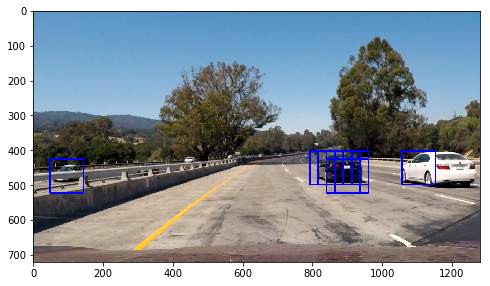

In [13]:
test_img_rects = draw_boxes(test_img, rectangles)
plt.figure(figsize=(8,6))
plt.imshow(test_img_rects)

# search on test  images

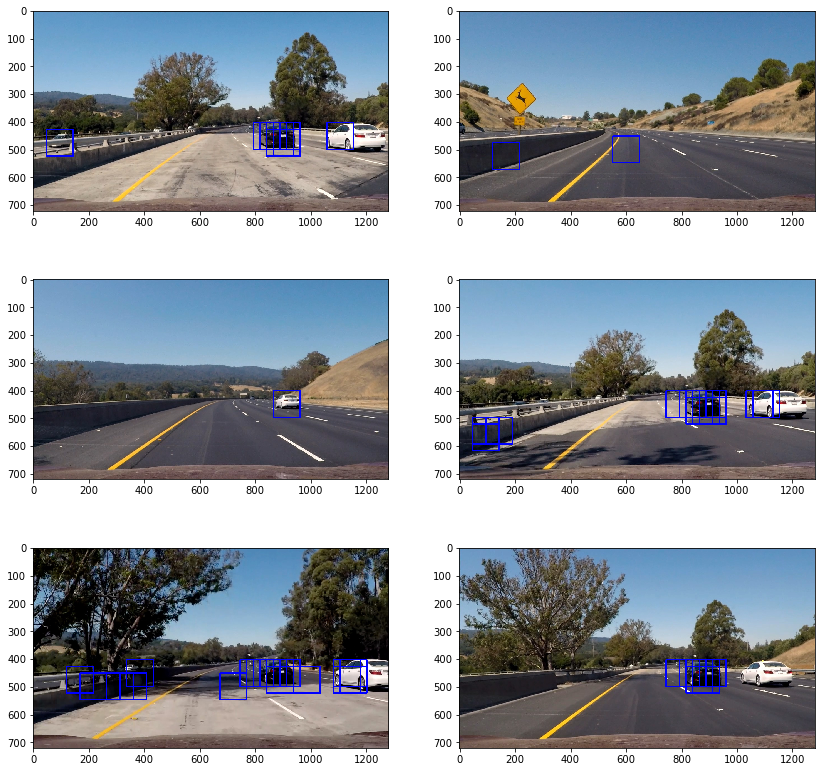

In [15]:
test_Imgs = glob.glob('test/*.jpg')
fig, axs = plt.subplots(3, 2, figsize=(14,14))
axs = axs.ravel()
for index, image in enumerate(test_Imgs):
    test_image = mpimg.imread(image)
    test_rectangles=search(test_image, ystart, ystop, scale,color_space , 
                                        svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    draw_image = draw_boxes(test_image, test_rectangles)
    axs[index].imshow( draw_image)
    

# Heat maps

In [101]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

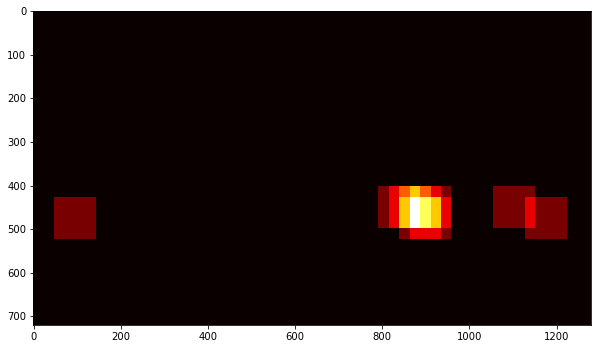

In [102]:
heat = np.zeros_like(test_img[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img = add_heat(heat,rectangles)
plt.figure(figsize=(10,10))
plt.imshow(heat, cmap='hot')

# six frames with their corresponding heatmaps

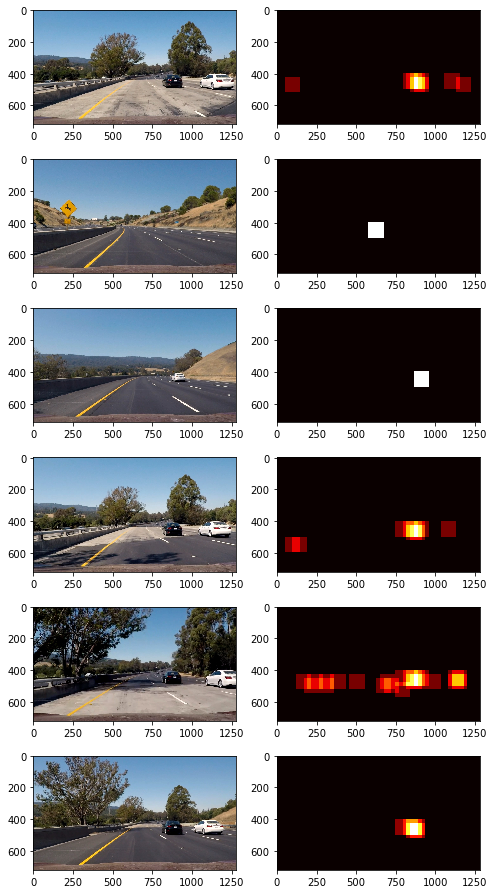

In [103]:
ystart = 402
ystop = 650
scale = 1.5

test_img_1 = mpimg.imread('test/test1.jpg')
rectangles_1 = search(test_img_1, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_1 = np.zeros_like(test_img_1[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_1 = add_heat(heat_1,rectangles_1)

test_img_2 = mpimg.imread('test/test2.jpg')
rectangles_2 = search(test_img_2, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_2 = np.zeros_like(test_img_2[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_2 = add_heat(heat_2,rectangles_2)

test_img_3 = mpimg.imread('test/test3.jpg')
rectangles_3 = search(test_img_3, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_3 = np.zeros_like(test_img_3[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_3 = add_heat(heat_3,rectangles_3)

test_img_4 = mpimg.imread('test/test4.jpg')
rectangles_4 = search(test_img_4, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_4 = np.zeros_like(test_img_4[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_4 = add_heat(heat_4,rectangles_4)

test_img_5 = mpimg.imread('test/test5.jpg')
rectangles_5 = search(test_img_5, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_5 = np.zeros_like(test_img_5[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_5 = add_heat(heat_5,rectangles_5)

test_img_6 = mpimg.imread('test/test6.jpg')
rectangles_6 = search(test_img_6, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
heat_6 = np.zeros_like(test_img_6[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat_img_6 = add_heat(heat_6,rectangles_6)

fig = plt.figure(figsize=(8,16))
fig.add_subplot(6,2,1)
plt.imshow(test_img_1)
fig.add_subplot(6,2,2)
plt.imshow(heat_img_1, cmap='hot')

fig.add_subplot(6,2,3)
plt.imshow(test_img_2)
fig.add_subplot(6,2,4)
plt.imshow(heat_img_2, cmap='hot')

fig.add_subplot(6,2,5)
plt.imshow(test_img_3)
fig.add_subplot(6,2,6)
plt.imshow(heat_img_3, cmap='hot')

fig.add_subplot(6,2,7)
plt.imshow(test_img_4)
fig.add_subplot(6,2,8)
plt.imshow(heat_img_4, cmap='hot')

fig.add_subplot(6,2,9)
plt.imshow(test_img_5)
fig.add_subplot(6,2,10)
plt.imshow(heat_img_5, cmap='hot')

fig.add_subplot(6,2,11)
plt.imshow(test_img_6)
fig.add_subplot(6,2,12)
plt.imshow(heat_img_6, cmap='hot')

# apply threshold

In [104]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

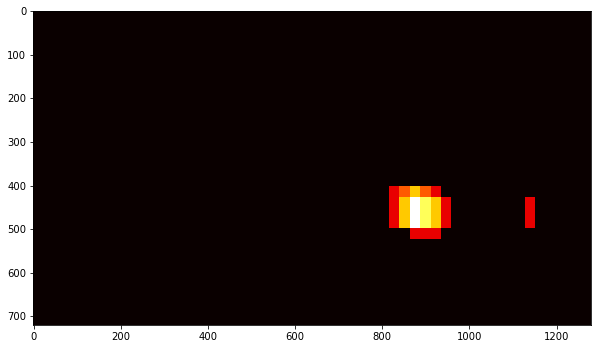

In [105]:
heat_img = apply_threshold(heat_img,1)
plt.figure(figsize=(10,10))
plt.imshow(heat_img,cmap='hot')

# apply labels 

no of cars found 2


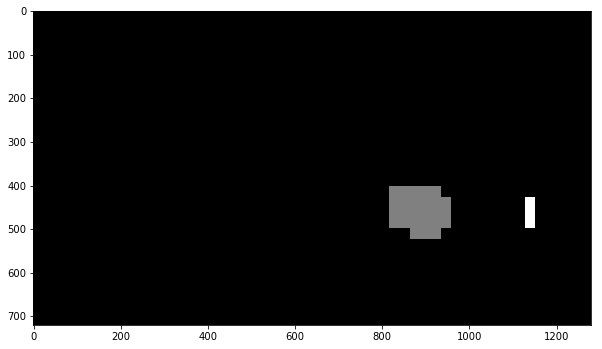

In [106]:
label_img = label(heat_img)
plt.figure(figsize=(10,10))
plt.imshow(label_img[0],cmap='gray')
print("no of cars found",label_img[1])

# heatmaps after applying labels

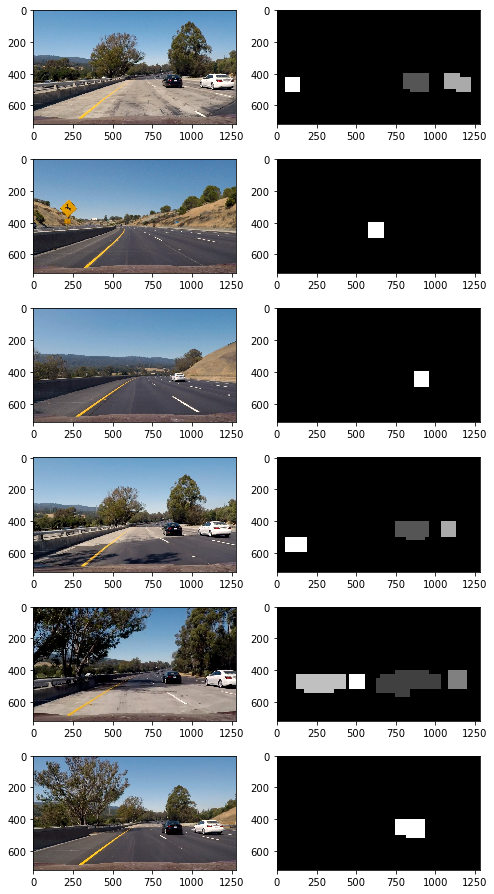

In [107]:

label_1 = label(heat_1)
label_2 = label(heat_2)
label_3 = label(heat_3)
label_4 = label(heat_4)
label_5 = label(heat_5)
label_6 = label(heat_6)


fig = plt.figure(figsize=(8,16))
fig.add_subplot(6,2,1)
plt.imshow(test_img_1)
fig.add_subplot(6,2,2)
plt.imshow(label_1[0], cmap='gray')

fig.add_subplot(6,2,3)
plt.imshow(test_img_2)
fig.add_subplot(6,2,4)
plt.imshow(label_2[0], cmap='gray')

fig.add_subplot(6,2,5)
plt.imshow(test_img_3)
fig.add_subplot(6,2,6)
plt.imshow(label_3[0], cmap='gray')

fig.add_subplot(6,2,7)
plt.imshow(test_img_4)
fig.add_subplot(6,2,8)
plt.imshow(label_4[0], cmap='gray')

fig.add_subplot(6,2,9)
plt.imshow(test_img_5)
fig.add_subplot(6,2,10)
plt.imshow(label_5[0], cmap='gray')

fig.add_subplot(6,2,11)
plt.imshow(test_img_6)
fig.add_subplot(6,2,12)
plt.imshow(label_6[0], cmap='gray')

# draw labeled boxes

In [108]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


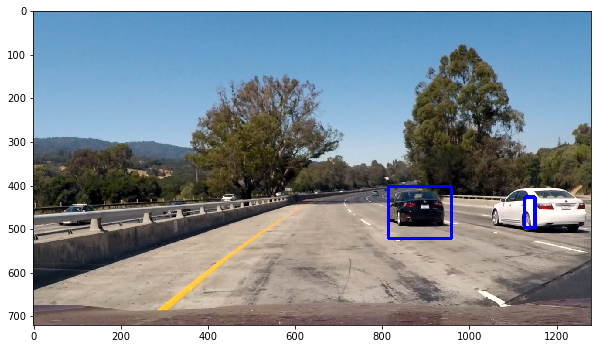

In [109]:
draw_img = draw_labeled_bboxes(np.copy(test_img), label_img)

fig = plt.figure(figsize=(10,10))
plt.imshow(draw_img)

In [119]:
rectangles=[]

# Experimenting with mutiple scales and diplaying rectangles on the test image

Number of rectangles detected  22


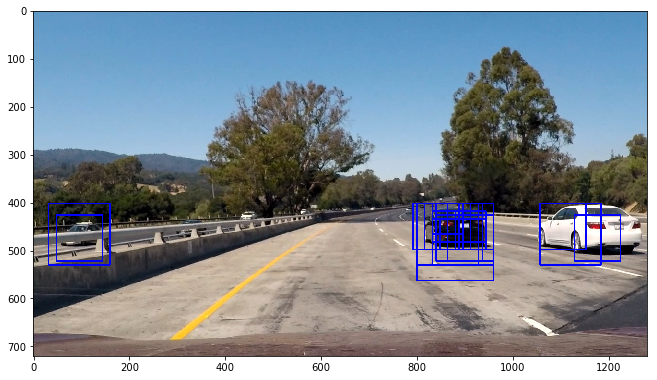

In [120]:
test_img = mpimg.imread('test1.jpg')

ystart = 402
ystop = 650
scale = 1.0

rectangles.append(search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 402
ystop = 650
scale = 1.5

rectangles.append(search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 402
ystop = 650
scale = 2.0

rectangles.append(search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 402
ystop = 650
scale = 2.5

rectangles.append(search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 402
ystop = 650
scale = 3.0

rectangles.append(search(test_img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

rectangles = [coordinates for list_ in rectangles for coordinates in list_]
print ('Number of rectangles detected ',len(rectangles))
test_img_rects = draw_boxes(test_img, rectangles, color=(0,0,255), thick=2)
plt.figure(figsize=(11,11))
plt.imshow(test_img_rects)


# pipeline 
This pipeline searches car in given image with varying scales and y_start,y_stop positions corresponding to different rectngles. once all rectangles are found then heat and labels are used to remove false positives and duplicates. 

In [92]:
def process_frame(img):
    
    rectangles=[]
    ystart = 402
    ystop = 500
    scale = 1.0

    rectangles.append(search(img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 402
    ystop = 600
    scale = 1.5

    rectangles.append(search(img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 402
    ystop = 600
    scale = 2.0

    rectangles.append(search(img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 402
    ystop = 630
    scale = 2.5

    rectangles.append(search(img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 402
    ystop = 650
    scale = 3.0

    rectangles.append(search(img, ystart, ystop, scale,color_space ,  svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    rectangles = [coordinates for list_ in rectangles for coordinates in list_] 
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat_img = add_heat(heat,rectangles)
    heat_img = apply_threshold(heat_img,1)
    label_img = label(heat_img)
    draw_img = draw_labeled_bboxes(np.copy(img), label_img)
    
    return draw_img
    

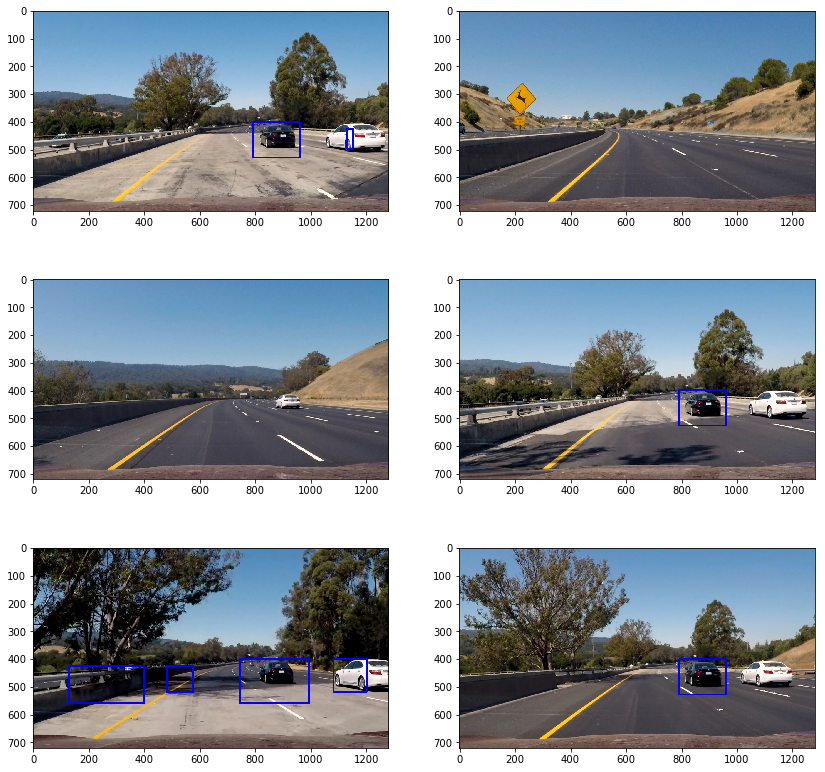

In [93]:
test_Imgs = glob.glob('test/*.jpg')
fig, axs = plt.subplots(3, 2, figsize=(14,14))
axs = axs.ravel()
for index, image in enumerate(test_Imgs):
    axs[index].imshow(process_frame(mpimg.imread(image)))

In [35]:
test_out_file = 'project_video_output.mp4'
clip_test = VideoFileClip('project_video.mp4')
clip_test_out = clip_test.fl_image(process_frame)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [43:09<00:01,  1.77s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 43min 10s


In [32]:
images

['test\\test1.jpg',
 'test\\test2.jpg',
 'test\\test3.jpg',
 'test\\test4.jpg',
 'test\\test5.jpg',
 'test\\test6.jpg']

In [28]:
from moviepy.editor import VideoFileClip


In [29]:
test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')
clip_test_out = clip_test.fl_image(process_frame)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [01:58<00:03,  3.09s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

Wall time: 2min 1s
